In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns

from collections import Counter
from collections import OrderedDict

from tabulate import tabulate


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [ ]:
### Fetching the dataset

df=pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
### Looking at the datatypes of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
###Here the column - diagnosis is categorical.We modify the datatype of these columns to category.
df.diagnosis = df.diagnosis.astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [ ]:
###checking if we have some null values in data
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
###dropping id column as it is not helpful for us
df.drop(['id'],inplace=True,axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We will transform the data using min max scaling. Min-Max scaling also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

Here, we will scale the data to a range of [0, 1].

In [ ]:

def min_max_scaling(dataset, column):
    data = list(dataset[column])
    new_data = [(value - min(data))/(max(data) - min(data)) for value in data]
    dataset[column] = new_data


In [ ]:
columns = list(df.columns)
numerical_columns = columns[1 : ]

for each_column in numerical_columns:
    min_max_scaling(df, each_column)
    
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [ ]:
### Encoding the target column - diagnosis

target_column = df['diagnosis']
encoded_target = [0 if value == 'B' else 1 for value in target_column]
encoded_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [ ]:
df['diagnosis']=encoded_target
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [ ]:
df['diagnosis'].describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

Now we plot various graphs using seaborn to figure out patterns in attributes and their effect on target variable.

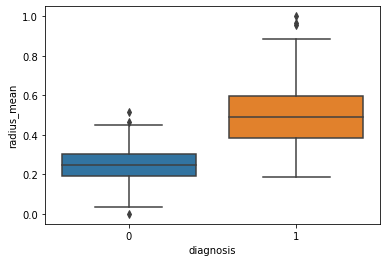

In [ ]:
sns.boxplot(y='radius_mean',x='diagnosis',data=df)

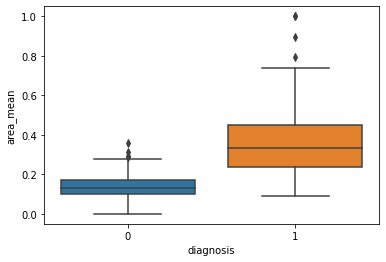

In [ ]:
sns.boxplot(y='area_mean',x='diagnosis',data=df)

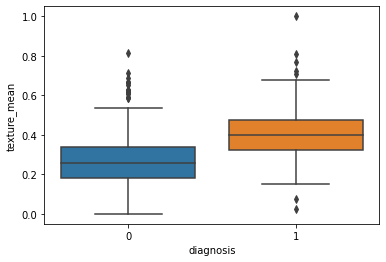

In [ ]:
sns.boxplot(y='texture_mean',x='diagnosis',data=df)

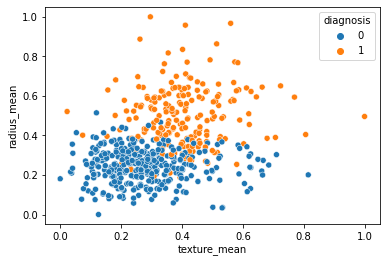

In [ ]:
sns.scatterplot(x='texture_mean',y='radius_mean',data=df,hue='diagnosis')

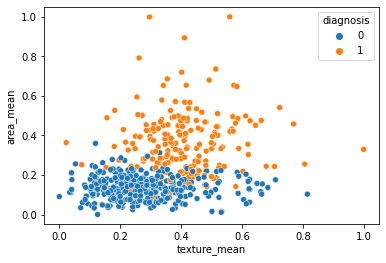

In [ ]:
sns.scatterplot(x='texture_mean',y='area_mean',data=df,hue='diagnosis')

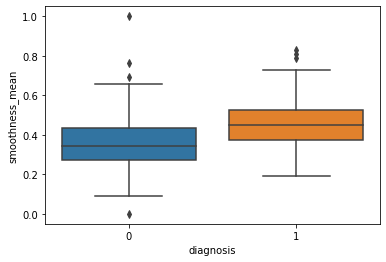

In [ ]:
sns.boxplot(y='smoothness_mean',data=df,x='diagnosis')

Splitting the data into Training and Test sets

In [ ]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 27)


In [ ]:
### Dictionary to store model and its accuracy

model_performance = OrderedDict()


Training the Logistic Regression model on the dataset


In [ ]:
logistic_classifier = LogisticRegression(random_state = 24)
logistic_classifier.fit(X_train, Y_train)


LogisticRegression(random_state=24)

In [ ]:
Y_pred = logistic_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Logistic Regression'] = logistic_accuracy
print(logistic_accuracy)


[[69  0]
 [ 3 42]]
97.37


Applying Support Vector Classification - Linear


In [ ]:
linear_svm_classifier = SVC(kernel = 'linear', random_state = 23)
linear_svm_classifier.fit(X_train, Y_train)


SVC(kernel='linear', random_state=23)

In [ ]:
Y_pred = linear_svm_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
linear_svc_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Linear SVC'] = linear_svc_accuracy
print(linear_svc_accuracy)


[[69  0]
 [ 3 42]]
97.37


Applying Kernel SVM Classification model


In [ ]:
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 27)
kernel_svm_classifier.fit(X_train, Y_train)


SVC(random_state=27)

In [ ]:
Y_pred = kernel_svm_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
kernel_svc_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Kernel SVC'] = kernel_svc_accuracy
print(kernel_svc_accuracy)

[[69  0]
 [ 2 43]]
98.25


Applying K-Nearest Neighbors (1-NN)


In [ ]:
classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
Y_pred = classifier_1nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['1 Nearest Neighbors'] = nn1_accuracy
print(nn1_accuracy)

[[66  3]
 [ 3 42]]
94.74


Applying K-Nearest Neighbors (3-NN)

In [ ]:
classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_pred = classifier_3nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['3 Nearest Neighbors'] = nn3_accuracy
print(nn3_accuracy)

[[68  1]
 [ 2 43]]
97.37


Applying K-Nearest Neighbors (5-NN)

In [ ]:
classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:
Y_pred = classifier_5nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['5 Nearest Neighbors'] = nn5_accuracy
print(nn5_accuracy)

[[68  1]
 [ 2 43]]
97.37


Applying K-Nearest Neighbors (7-NN)

In [ ]:
classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_pred = classifier_7nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['7 Nearest Neighbors'] = nn7_accuracy
print(nn7_accuracy)

[[68  1]
 [ 2 43]]
97.37


Applying K-Nearest Neighbors (9-NN)

In [ ]:
classifier_9nn = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_9nn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
Y_pred = classifier_9nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn9_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['9 Nearest Neighbors'] = nn9_accuracy
print(nn9_accuracy)

[[68  1]
 [ 4 41]]
95.61


Applying K-Nearest Neighbors (11-NN)

In [ ]:
classifier_11nn = KNeighborsClassifier(n_neighbors = 11, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_11nn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
Y_pred = classifier_11nn.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
nn11_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['11 Nearest Neighbors'] = nn11_accuracy
print(nn11_accuracy)

[[68  1]
 [ 5 40]]
94.74


Looking at the accuracy graph of all the nearest neighbors

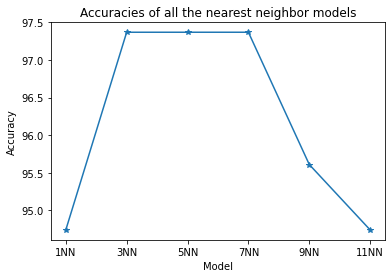

In [ ]:

labels = ['1NN', '3NN', '5NN', '7NN', '9NN', '11NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy, nn9_accuracy, nn11_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()


 Applying Gaussian Naive Bayes Classification


In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)


GaussianNB()

In [ ]:
Y_pred = naive_bayes_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Gaussian Naive Bayes'] = naive_bayes_accuracy
print(naive_bayes_accuracy)

[[68  1]
 [ 4 41]]
95.61


Applying Decision Tree Classification model


In [ ]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=27)

In [ ]:
Y_pred = decision_tree_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Decision Tree'] = decision_tree_accuracy
print(decision_tree_accuracy)

[[63  6]
 [ 3 42]]
92.11


 Applying Random Forest Classification (10 trees)


In [ ]:
random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [ ]:
Y_pred = random_forest_10_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (10 trees)'] = random_forest_10_accuracy
print(random_forest_10_accuracy)

[[67  2]
 [ 4 41]]
94.74


 Applying Random Forest Classification (25 trees)


In [ ]:
random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [ ]:
Y_pred = random_forest_25_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (25 trees)'] = random_forest_25_accuracy
print(random_forest_25_accuracy)

[[68  1]
 [ 3 42]]
96.49


 Applying Random Forest Classification (50 trees)


In [ ]:
random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [ ]:
Y_pred = random_forest_50_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (50 trees)'] = random_forest_50_accuracy
print(random_forest_50_accuracy)

[[67  2]
 [ 3 42]]
95.61


 Applying Random Forest Classification (100 trees)


In [ ]:
random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', random_state=27)

In [ ]:
Y_pred = random_forest_100_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_performance['Random Forest (100 trees)'] = random_forest_100_accuracy
print(random_forest_100_accuracy)

[[67  2]
 [ 3 42]]
95.61


Tabulating the results


In [ ]:
model_performance


OrderedDict([('Logistic Regression', 97.37),
             ('Linear SVC', 97.37),
             ('Kernel SVC', 98.25),
             ('1 Nearest Neighbors', 94.74),
             ('3 Nearest Neighbors', 97.37),
             ('5 Nearest Neighbors', 97.37),
             ('7 Nearest Neighbors', 97.37),
             ('9 Nearest Neighbors', 95.61),
             ('11 Nearest Neighbors', 94.74),
             ('Gaussian Naive Bayes', 95.61),
             ('Decision Tree', 92.11),
             ('Random Forest (10 trees)', 94.74),
             ('Random Forest (25 trees)', 96.49),
             ('Random Forest (50 trees)', 95.61),
             ('Random Forest (100 trees)', 95.61)])

In [ ]:
classifiers = []
classifiers.append(logistic_classifier)
classifiers.append(linear_svm_classifier)
classifiers.append(kernel_svm_classifier)
classifiers.append(classifier_1nn)
classifiers.append(classifier_3nn)
classifiers.append(classifier_5nn)
classifiers.append(classifier_7nn)
classifiers.append(classifier_9nn)
classifiers.append(classifier_11nn)
classifiers.append(naive_bayes_classifier)
classifiers.append(decision_tree_classifier)
classifiers.append(random_forest_10_classifier)
classifiers.append(random_forest_25_classifier)
classifiers.append(random_forest_50_classifier)
classifiers.append(random_forest_100_classifier)


We should analyse model's ability to predict out-of-samples data,i.e. data our model has not seen before. This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes

In [ ]:
validation_accuracies = []
standard_deviations = []

for each_classifier in classifiers:
    accuracy = cross_val_score(estimator = each_classifier, X = X_train, y = Y_train, cv = 50)
    validation_accuracies.append(np.mean(accuracy) * 100)
    standard_deviations.append(accuracy.std() * 100)
    
validation_accuracies


[96.51111111111112,
 97.42222222222222,
 97.37777777777778,
 94.93333333333334,
 96.93333333333334,
 96.26666666666668,
 96.93333333333334,
 97.82222222222222,
 97.60000000000001,
 93.17777777777778,
 92.53333333333332,
 96.26666666666667,
 95.82222222222222,
 95.82222222222222,
 96.48888888888888]

In [ ]:
table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Validation Accuracy', 'Standard Deviation'])
count = 1
for model in model_performance:
    row = [count, model, model_performance[model], validation_accuracies[count - 1], standard_deviations[count - 1]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))


╒═════════╤═══════════════════════════╤══════════════════╤═══════════════════════╤══════════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │   Validation Accuracy │   Standard Deviation │
╞═════════╪═══════════════════════════╪══════════════════╪═══════════════════════╪══════════════════════╡
│       1 │ Logistic Regression       │            97.37 │               96.5111 │              5.5556  │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       2 │ Linear SVC                │            97.37 │               97.4222 │              4.59436 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       3 │ Kernel SVC                │            98.25 │               97.3778 │              5.17239 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────────┼──────────────────────┤
│       4 │ 1 Nearest Neighbors       │       